In [73]:
%matplotlib notebook
import cv2
import matplotlib.pyplot as plt

In [74]:
def downsample_clip(input_file, suffix=None, output_file=None):
    suffix = suffix or '.mp4'
    output_file = output_file or (input_file + '_normal' + suffix)
 
    cap = cv2.VideoCapture(input_file + suffix)   
    N = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    frameSize = (int(cap.get(3)),int(cap.get(4)))    

    fourcc = cv2.VideoWriter_fourcc(*'MP4V')
    writer = cv2.VideoWriter(output_file, fourcc, fps, frameSize)
    
    for i in range(0, N, 8):
        cap.set(1, i)
        ret, frame = cap.read()
        if ret:
            writer.write(frame)
            
    writer.release()
    cap.release()

# Downsample video

## How to use
1. Change the file name in the cell below
2. Run all cells in this section 
3. Wait until the job finishes

In [75]:
# Change input file name here
file = 'DJI_0113'

In [76]:
downsample_clip(file)

KeyboardInterrupt: 

## Extract frames ##

<IPython.core.display.Javascript object>


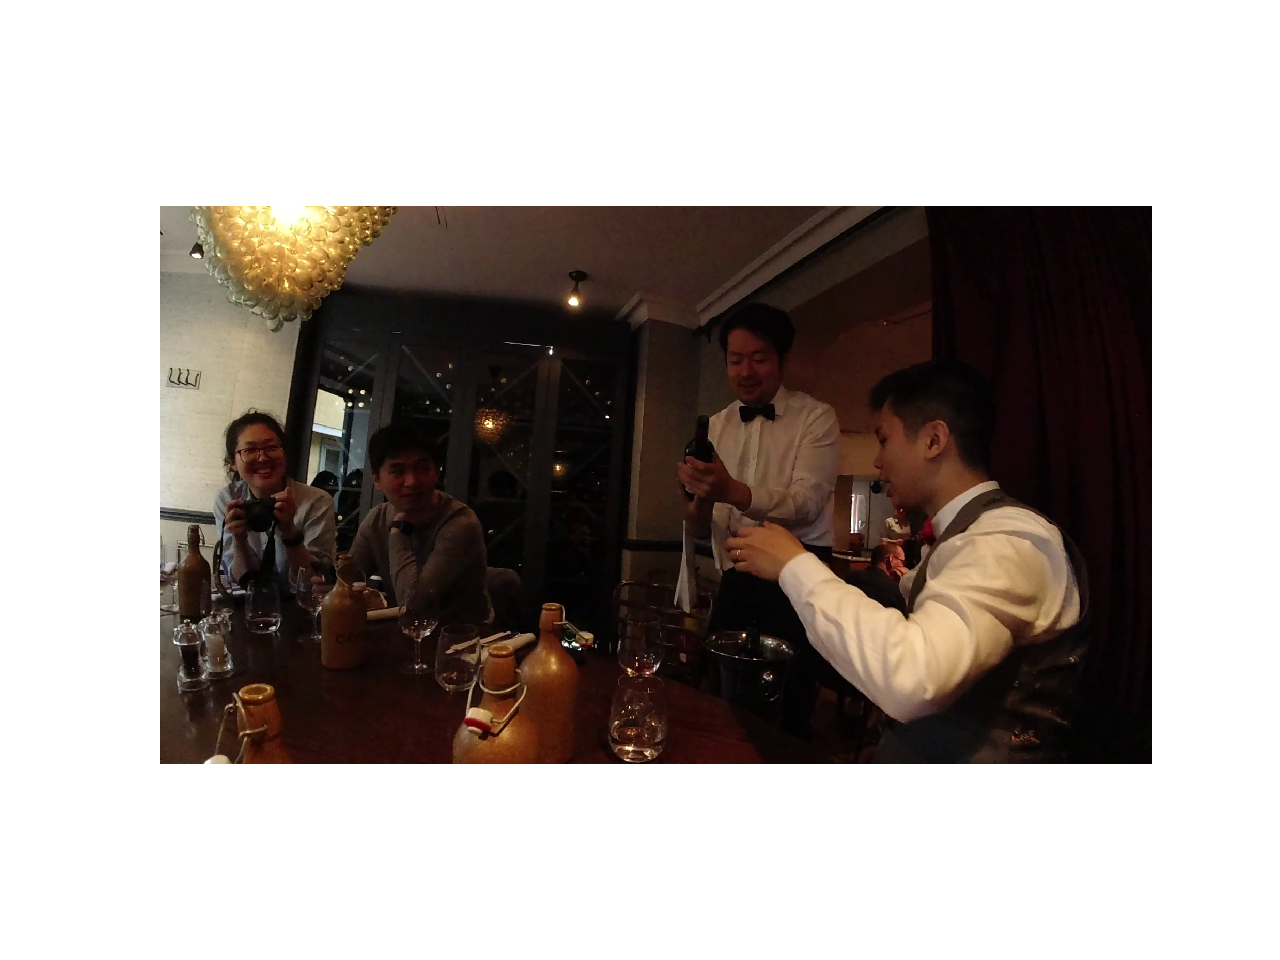

True

In [67]:
m = 0  # Minute
s = 2  # Second
f = 0  # frame number
frame_no = 25*(m*60+s) + f
cap.set(1,frame_no) # Where frame_no is the frame you want
ret, frame = cap.read() # Read the frame
img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB) 
plt.axis('off')
plt.imshow(img)
cv2.imwrite("frame_{}.jpg".format(frame_no), frame, [cv2.IMWRITE_JPEG_QUALITY,100])